In [2]:
%matplotlib inline

import json
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import statistics

# Read in RRI data and plot

In [85]:
filename = 'FC_example_RR_only.json'
data_json = json.load(open(filename,'r'))

In [86]:
sessions = data_json["sessions"]
for session in sessions:
    print("new session =====================")
    for k in session.keys():
        if type(session[k]) is list: # if its a list, print out the length
            print("{} len: {}".format(k,len(session[k])))
        else: print("{} {}".format(k,session[k])) #otherwise print the contents
    for channel in session["channels"]: # print all channel information for each session
        print("channel ========")
        for l in channel.keys():
            if type(channel[l]) is list:
                print("{} len: {}".format(l,len(channel[l])))
            else: print("{} {}".format(l,channel[l]))

new session =====================
start_ms_utc 1476025751000
isValid true
userId fab0e064-9b03-4158-98e9-19499147d8d9
sessionId 11981
stop_ms_utc 1476028927000
channels len: 1
questions {'QuestionA': '4', 'QuestionB': '5', 'QuestionD': '2', 'QuestionE': '1', 'QuestionC': '2'}
email edibubba@gmail.com
channel ========
sampleRate 10
sessionId 11981
channelName RR
channelId 21083
samples len: 0
totalSamples 0
new session =====================
start_ms_utc 1475988837000
isValid true
userId fab0e064-9b03-4158-98e9-19499147d8d9
sessionId 11943
stop_ms_utc 1475992373000
channels len: 1
questions {'QuestionA': '3', 'QuestionB': '6', 'QuestionD': '1', 'QuestionE': '1', 'QuestionC': '1'}
email edibubba@gmail.com
channel ========
sampleRate 10
sessionId 11943
channelName RR
channelId 21017
samples len: 35354
totalSamples 35354
new session =====================
start_ms_utc 1475904025000
isValid true
userId fab0e064-9b03-4158-98e9-19499147d8d9
sessionId 11898
stop_ms_utc 1475907692000
channels len

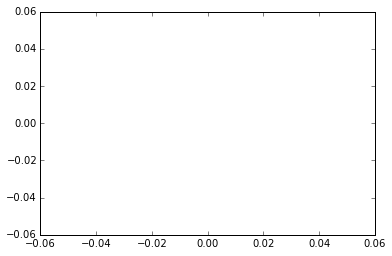

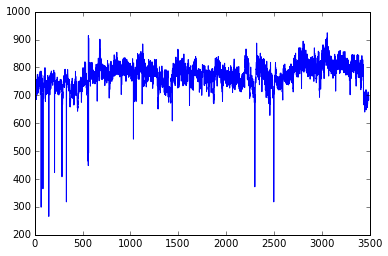

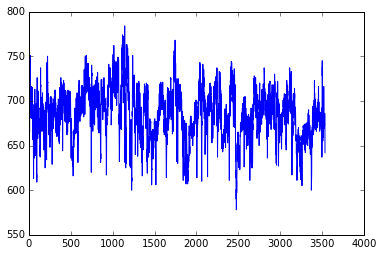

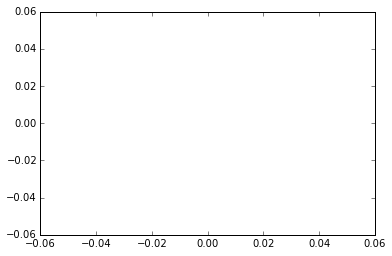

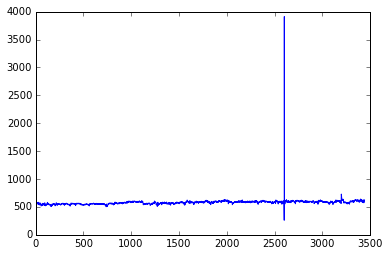

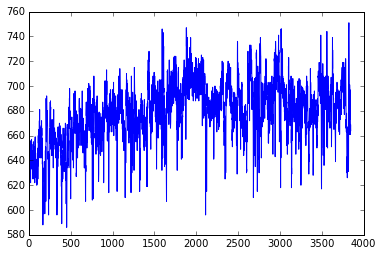

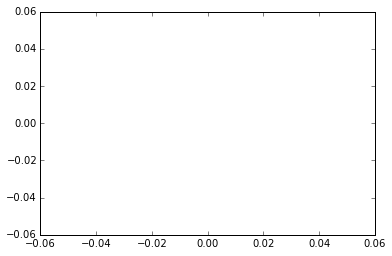

In [87]:
from itertools import groupby

def deduplicate(original_list):
    return list(item[0] for item in groupby(original_list))

RR_samples = []
for session in sessions:
    for channel in session["channels"]:
        if channel["channelName"] == "RR":
            samples = deduplicate(channel['samples'])
            RR_samples.append(samples)
            plt.figure()
            plt.plot(samples)
#         plt.title("{} {}".format(k,data_json[k][k2]['description']))
#         plt.xlabel('interval index')
#         plt.ylabel('ms')

# Load into Pandas DataFrame
## keep only the sessions with data and chop off any extra time on other sessions to make all equal length 
## (note that you could probably instead pad with Nones to keep other data)

In [88]:
sessions_to_keep = [1,2,4,5]

min_len = min(len(sample) for sample in (RR_samples[i] for i in sessions_to_keep))
data_df = pd.DataFrame({str(i):RR_samples[i][:min_len] for i in sessions_to_keep})

3439


# Plot running windowed STD of RRI
## window parameter is window size (i.e. number of RR samples)

(0, 80)

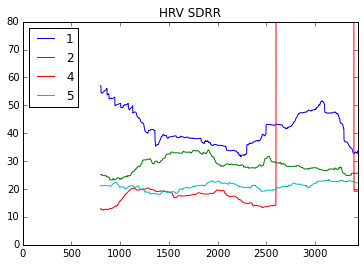

In [89]:
pd.rolling_std(data_df,window=800).plot()
plt.title("HRV SDRR")
plt.ylim(0,80)


# Plot running windowed RMSSD (root mean square of successive differences)

(0, 80)

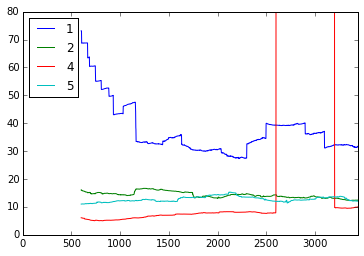

In [66]:
def root_mean_square(vals):
    return np.sqrt(np.mean(np.square(vals)))

pd.rolling_apply(data_df - data_df.shift(1),600,root_mean_square).plot()
plt.ylim(0,80)

# Plot Poincare Return Map of RRI

/Users/watson/code/python/packages/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


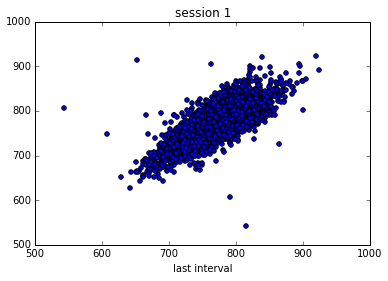

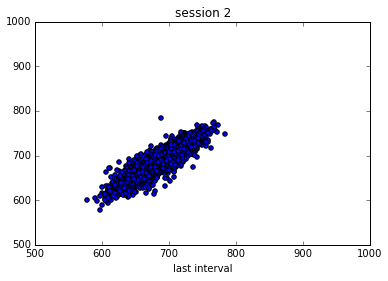

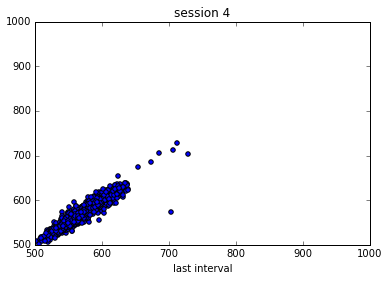

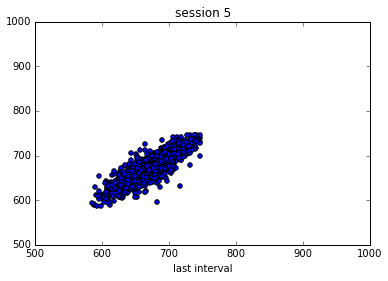

In [91]:
for k in sessions_to_keep:
    k = str(k) #turn into str key for dictionary
    plt.figure()
    plt.scatter(data_df[k],data_df[k].shift(1))
    plt.xlim(500,1000)
    plt.ylim(500,1000)
    plt.xlabel('current interval')
    plt.xlabel('last interval')
    plt.title("session {}".format(k))

# Other things to do

## statistical tests (e.g. t-test)
## box plot
## categorization (use sci-kit learn)
## freq domain HRV 
## visualization 
    e.g.: extension of Poincare: current vs weighted average of previous several values
    e.g.2: visualize in freq domain PSD

# Utility code to save only the RR interval data from the JSON (run after importing and getting the sessions variable above)

In [ ]:
filename2 = 'FC_example_RR_only.json'

for session in sessions:
    session["channels"] = [session["channels"][i] for i in range(len(session["channels"])) if (session["channels"][i]["channelName"] == "RR")]
                
json.dump(data_json,open(filename2,'w'))